In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
mpl.rc("font", size=15)

In [4]:
import DA

In [5]:
N = 40
T = 0.05  # 6h = 1/4 day = 0.2 / 4
U = DA.Lorenz96.teo(8, T, 5)

In [6]:
p = 40
K = 40
H = DA.observation.trivial(N)
R_inv = np.identity(p)
A = DA.ETKF.analysis(H, R_inv)
F = DA.ETKF.forcast(U)

In [7]:
x = np.sin(np.arange(0, np.pi, np.pi/N))
tl = []
for t in range(500):
    x = U(x)
    tl.append(x.copy())
tl = np.array(tl)

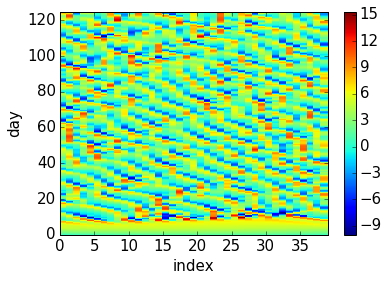

In [8]:
index = range(N)
day = 0.25*np.arange(len(tl))
X, Y = np.meshgrid(index, day)
plt.pcolormesh(X, Y, tl)
plt.axis("tight")
plt.xlabel("index")
plt.ylabel("day")
plt.colorbar()
plt.savefig("xt.png", bbox_inches="tight")

In [9]:
xa = x.copy()
Xa = DA.ETKF.make_ensemble(N, K, 1)

In [10]:
tl = []
for t in range(1000):
    x = U(x)
    xb, Xb = F(xa, Xa)
    xa, Xa = A(xb, Xb, H(x)+np.random.normal(size=N))
    tl.append((np.linalg.norm(x-xa) / np.sqrt(N), np.average(np.std(Xa, axis=1)), x[0], xa[0]))
    Xa += DA.ETKF.make_ensemble(N, K, 0.01)
df = pd.DataFrame(tl, index=0.25*np.arange(len(tl)), columns=["RMS", "std", "truth", "estimate"])
df.index.name = "day"

0.196554695276


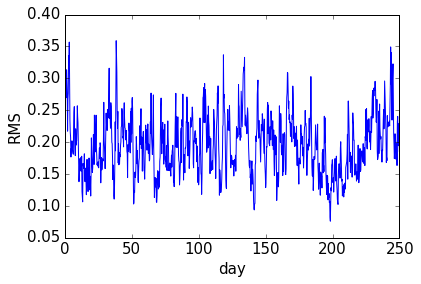

In [11]:
df["RMS"].plot()
plt.ylabel("RMS")
print(df["RMS"].mean())
plt.savefig("ETKF_RMS.png", bbox_inches="tight")

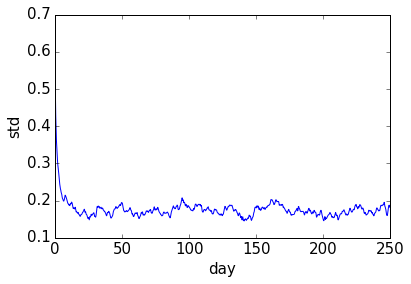

In [12]:
df["std"].plot()
plt.ylabel("std")

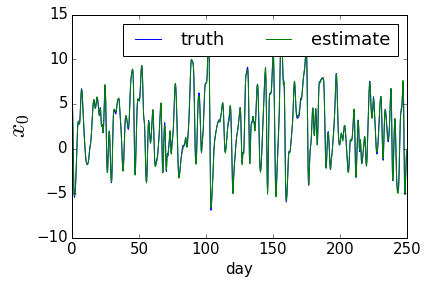

In [13]:
df[["truth", "estimate"]].plot()
plt.ylabel(r"$x_0$", fontsize=25)
plt.legend(ncol=2)
plt.savefig("ETKF_x0.png", bbox_inches="tight")